# How stable are representation of the same trial across sessions?

In [1]:
### from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [3]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
# %%javascript
# var nb = IPython.notebook;
# var kernel = IPython.notebook.kernel;
# var command = "NOTEBOOK_NAME = '" + nb.base_url + nb.notebook_path + "'";
# kernel.execute(command);

In [5]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'decoding_variability_across_sessions_05sec_vhpc'

In [6]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'do_test_within', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'do_test_cross_distinct', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'load_all_animals_vars', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [14]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [26]:
all_animals =     'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
pre_animals =     'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
post_animals =    'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93','91b','92b','93b'
pre_rev_animals = 'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
post_rev_animals ='c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93','91b','92b','93b'
catch_animals =   'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'

In [27]:
#find animals common to both sessions
preVSpost_animals =       'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
preVSpre_rev_animals =    'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
preVSpost_rev_animals =   'c3f3',         'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91',       '93'
postVSpost_rev_animals =  'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93','91b','92b','93b'
postVSpre_rev_animals =   'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
pre_revVSpost_rev_animals='c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
postVScatch_animals =     'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
post_revVScatch_animals=  'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92',

In [28]:
sessions = 'pre','post','pre_rev','post_rev','catch'

In [29]:
for sess in sessions:
    for dur in 5,: #use 5 for 0.5sec, 1 for 1 sec and 2 for 2sec
        exec("patterns_tb_%s_%s = dict(zip(%s_animals, [ut.load_variable('patterns_tb_%s_%s',\
                                                           '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(sess,dur,sess,sess,dur,sess))
        exec("labels_%s = dict(zip(%s_animals, [ut.load_variable('labels_%s',\
                                                         '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(sess,sess,sess,sess))

In [30]:
#delta_t0 = 0.5sec
#from referenced notebook, 28 time bins total beginning at 3s prior to odor onset and running through 10.5s post onset

#t_start0 = -3  # sec
#t_stop0 = 11  # sec

In [31]:
comparisons = 'preVSpost','preVSpre_rev','preVSpost_rev','postVSpre_rev','postVSpost_rev','pre_revVSpost_rev','postVScatch','post_revVScatch'

In [32]:
#get cross-session patterns
for comp in comparisons:
    for dur in 5,:
        exec("%s__patterns__%s = dict(zip(%s_animals, [ut.load_variable('%s_patterns_%s_%s',\
                                                           '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(comp,comp.split('VS')[0],comp,
                                                    comp,comp.split('VS')[0],dur,comp))
        exec("%s__patterns__%s = dict(zip(%s_animals, [ut.load_variable('%s_patterns_%s_%s',\
                                                           '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(comp,comp.split('VS')[1],comp,
                                                    comp,comp.split('VS')[1],dur,comp))
        exec("labels_%s_%s = dict(zip(%s_animals, [ut.load_variable('labels_%s',\
                                                         '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(comp,comp.split('VS')[0],comp,comp.split('VS')[0],
                                                                            comp))
        exec("labels_%s_%s = dict(zip(%s_animals, [ut.load_variable('labels_%s',\
                                                         '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(comp,comp.split('VS')[1],comp,comp.split('VS')[1],
                                                                            comp))

In [33]:
#relabel and combine session labels for 2 sessions into 1 array
#(so can test decoding of same trial type across different sessions)

relabel_csm_sess1 = {0:0, 1:-1, 2:-1, -1:-1, -2:-2}
relabel_csm_sess2 = {0:1, 1:-1, 2:-1, -1:-1, -2:-2}
relabel_rw_sess1 =  {0:-1, 1:0, 2:-1, -1:-1, -2:-2}
relabel_rw_sess2 =  {0:-1, 1:1, 2:-1, -1:-1, -2:-2}
relabel_sh_sess1 =  {0:-1, 1:-1, 2:0, -1:-1, -2:-2}
relabel_sh_sess2 =  {0:-1, 1:-1, 2:1, -1:-1, -2:-2}

for comp in comparisons:
    exec("labels_csm_%s = {}"%comp)
    exec("labels_rw_%s = {}"%comp)
    exec("labels_sh_%s = {}"%comp)
    for ani in eval("%s_animals"%comp):
        exec("labels_csm_%s[ani] = np.r_[[relabel_csm_sess1[l] for l in labels_%s[ani]]+[relabel_csm_sess2[l] for l in labels_%s[ani]]]"%(comp,comp.split('VS')[0],comp.split('VS')[1]))
        exec("labels_rw_%s[ani] = np.r_[[relabel_rw_sess1[l] for l in labels_%s[ani]]+[relabel_rw_sess2[l] for l in labels_%s[ani]]]"%(comp,comp.split('VS')[0],comp.split('VS')[1]))
        exec("labels_sh_%s[ani] = np.r_[[relabel_sh_sess1[l] for l in labels_%s[ani]]+[relabel_sh_sess2[l] for l in labels_%s[ani]]]"%(comp,comp.split('VS')[0],comp.split('VS')[1]))

In [34]:
#now combine patterns across 2 sessions into 1 array
for comp in comparisons:
    exec("patterns__%s__combo = {}"%comp)
    for ani in eval("%s_animals"%comp):
        #for tb in range(len(eval("%s__patterns__%s[ani]"%(comp,comp.split('VS')[0])))): ## of bins
            #for trial in range(len(eval("%s__patterns__%s[ani][0]"%(comp,comp.split('VS')[0])))): ## of trials
                #for neuron in range(len(eval("%s__patterns__%s[ani][0][0]"%(comp,comp.split('VS')[0])))): ## of neurons
        exec("patterns__%s__combo[ani] = np.concatenate((%s__patterns__%s[ani],%s__patterns__%s[ani]),axis=1)"%(comp,
                comp,comp.split('VS')[0],comp,comp.split('VS')[1]))

In [36]:
for comp in comparisons:
    for t in range(len(patterns_tb_pre_5['c10m8'])): #how many time bins
        exec("%s_tb_%s = {}"%(comp,t))
        for ani in eval('%s_animals'%comp.split('__')[0]):
            try:
                #print comp.split('-')[0],
                #print ani,
                #print t,
                exec("%s_tb_%s['%s'] = patterns__%s__combo['%s'][%s]"%(comp,t,ani,comp,ani,t))
            except IOError as error:
                print 'ERROR'
            continue

# set whether you want to use all cells, downsample to min cells for each compared session, or dowsample to global minimum of cells across all comparisons

In [37]:
#set downsampling parameter to:
#max_cells = all cells
#intraregion_min = downsample to the comparison with fewest cells within the same hippo region
#interregion_min = downsample to the comparison with fewest cells, considering both hippo regions
#gmin = the global minimum (pretty much corresponds to interregion_min)

downsample = 'gmin'

In [38]:
if downsample == 'max_cells':
    n_cells = None #will use all registered cells
if downsample == 'intraregion_min':
    n_cells = ut.load_variable('n_cells_across_min_vhpc', '../notebooks/autorestore/n_cells/')
if downsample == 'interregion_min':
    n_cells = ut.load_variable('n_cells_across_min_overall', '../notebooks/autorestore/n_cells/')
if downsample == 'gmin':
    n_cells = ut.load_variable('n_cells_gmin', '../notebooks/autorestore/n_cells/')
if downsample == 200:
    n_cells = 200

In [39]:
n_cells

171

# use distinct trials for train and test

In [40]:
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.svm import SVC
decoder = SVC(kernel='linear', decision_function_shape='ovo')

def do_test_within(patterns, labels, n_cells=None, classes=None):
#     which_train = range(90)
#     which_test = range(90)
#    cv =LeaveOneOut()
    
    if classes == None:
        classes = [0,1]
    which_train = {}
    which_test = {}
    for ani in patterns.keys():
        which_train_a = np.random.permutation(np.where(labels[ani]==0)[0])
        which_test_a = which_train_a[:len(which_train_a)/2]
        which_train_a = which_train_a[len(which_train_a)/2:]
        
        which_train_b = np.random.permutation(np.where(labels[ani]==1)[0])
        which_test_b = which_train_b[:len(which_train_b)/2]
        which_train_b = which_train_b[len(which_train_b)/2:]
        
        which_train[ani] = np.concatenate((which_train_a, which_train_b))
        which_test[ani] = np.concatenate((which_test_a, which_test_b))
    
    patterns_t = patterns.copy()
    labels_t = labels.copy()
    patterns_T = patterns.copy()
    labels_T = labels.copy()
    for ani in patterns.keys():
        patterns_t[ani] = patterns[ani][which_train[ani]]
        labels_t[ani] = labels[ani][which_train[ani]]
        patterns_T[ani] = patterns[ani][which_test[ani]]
        labels_T[ani] = labels[ani][which_test[ani]]
    patterns_comb_train, labels_comb = ut.combine_patterns(patterns_t, labels_t)
    patterns_comb_test, labels_comb = ut.combine_patterns(patterns_T, labels_T)
    
    if n_cells is None:
        cells = list(range(patterns_comb_train.shape[1]))
    elif n_cells > patterns_comb_train.shape[1]:
        cells = list(range(patterns_comb_train.shape[1]))
        print len(cells),
    else:
        cells = np.random.choice(range(patterns_comb_train.shape[1]), size=n_cells, replace=False)
        
    decoder.fit(patterns_comb_train[:, cells], labels_comb)
    scores = decoder.score(patterns_comb_test[:, cells], labels_comb)
    decoder.fit(patterns_comb_test[:, cells], labels_comb)
    return np.append(scores, decoder.score(patterns_comb_train[:, cells], labels_comb))

In [41]:
#trying to use different trials for different time bins
from sklearn.svm import SVC
decoder = SVC(kernel='linear', decision_function_shape='ovo')

def do_test_cross_distinct(patterns_t, labels_t, patterns_T, labels_T, n_cells=None, classes=None):
    if classes==None:
        classes=[0,1]
    which_train = {}
    which_test = {}
    for ani in patterns_t.keys():
        which_train_a = np.random.permutation(np.where(labels_t[ani]==0)[0])
        which_test_a = which_train_a[:len(which_train_a)/2]
        which_train_a = which_train_a[len(which_train_a)/2:]
        
        which_train_b = np.random.permutation(np.where(labels_t[ani]==1)[0])
        which_test_b = which_train_b[:len(which_train_b)/2]
        which_train_b = which_train_b[len(which_train_b)/2:]
        
        which_train[ani] = np.concatenate((which_train_a, which_train_b))
        which_test[ani] = np.concatenate((which_test_a, which_test_b))
    patterns_dt = patterns_t.copy()
    labels_dt = labels_t.copy()
    patterns_dT = patterns_T.copy()
    labels_dT = labels_T.copy()
    for ani in patterns_t.keys():
        patterns_dt[ani] = patterns_dt[ani][which_train[ani]]
        labels_dt[ani] = labels_dt[ani][which_train[ani]]
        patterns_dT[ani] = patterns_dT[ani][which_test[ani]]
        labels_dT[ani] = labels_dT[ani][which_test[ani]]      
        
    patterns_comb_train, labels_comb = ut.combine_patterns(patterns_dt, labels_dt)
    patterns_comb_test, labels_comb = ut.combine_patterns(patterns_dT, labels_dT)
    
    if n_cells is None:
        cells = list(range(patterns_comb_train.shape[1]))
        print len(cells),
    elif n_cells > patterns_comb_train.shape[1]:
        cells = list(range(patterns_comb_train.shape[1]))
        #print len(cells),
    else:
        cells = np.random.choice(range(patterns_comb_train.shape[1]), size=n_cells, replace=False)
        #print cells.shape,
    
    decoder.fit(patterns_comb_train[:, cells], labels_comb)
    scores = decoder.score(patterns_comb_test[:, cells], labels_comb)
    decoder.fit(patterns_comb_test[:, cells], labels_comb)
    return np.append(scores, decoder.score(patterns_comb_train[:, cells], labels_comb))

In [71]:
%%time
#across time bins, across sessions
n_loops=15
for vs in 'csm','sh','rw':
    for comp in comparisons:
        for t in range(25):
            for c in range(25):
                exec('%s_scores_%s_tb%svs%s = {}'%(vs,comp,t,c))
                #print comp,t,c," ",
                exec('%s_scores_%s_tb%svs%s = np.r_[[do_test_cross_distinct(%s_tb_%s,labels_%s_%s,%s_tb_%s,labels_%s_%s,n_cells=n_cells,classes=None)\
                for r in range(n_loops)]]'%(vs,comp,t,c,comp,t,vs,comp,comp,c,vs,comp))
        exec("print '%s %s',"%(vs,comp))
        print 'DONE!',
        print '    ',

csm preVSpost DONE!      csm preVSpre_rev DONE!      csm preVSpost_rev DONE!      csm postVSpre_rev DONE!      csm postVSpost_rev DONE!      csm pre_revVSpost_rev DONE!      csm postVScatch DONE!      csm post_revVScatch DONE!      sh preVSpost DONE!      sh preVSpre_rev DONE!      sh preVSpost_rev DONE!      sh postVSpre_rev DONE!      sh postVSpost_rev DONE!      sh pre_revVSpost_rev DONE!      sh postVScatch DONE!      sh post_revVScatch DONE!      rw preVSpost DONE!      rw preVSpre_rev DONE!      rw preVSpost_rev DONE!      rw postVSpre_rev DONE!      rw postVSpost_rev DONE!      rw pre_revVSpost_rev DONE!      rw postVScatch DONE!      rw post_revVScatch DONE!     CPU times: user 3h 22min 42s, sys: 15.2 s, total: 3h 22min 58s
Wall time: 3h 22min 40s



In [72]:
##These comparisons are included with the above. But can run this if only want to look at within time bin comparisons
##across sessions (this will take much less time to run)
#%%time
##within a time bin, across sessions
#n_loops=10
#for vs in 'csm','sh','rw':
#    for comp in comparisons:
#        for t in range(25):
#                exec('%s_scores__%s__tb%s = {}'%(vs,comp,t))
#                #print comp,t,c," ",
#                exec('%s_scores__%s__tb%s = np.r_[[do_test_within(%s_tb_%s,labels_%s_%s,n_cells=n_cells,classes=None)\
#                for r in range(n_loops)]]'%(vs,comp,t,comp,t,vs,comp))
#        exec("print '%s %s',"%(vs,comp))
#        print 'DONE!',
#        print '    ',

### organize data for plotting. First collect all data into array, then make diff arrays with just the means (for implots)
it's a mess, I know. But it's functional!

In [73]:
for t in range(25):
    exec('csm_all_%s = {}'%t)
    exec('sh_all_%s = {}'%t)
    exec('rw_all_%s = {}'%t)
    exec('csm_win_%s = {}'%t)
    exec('sh_win_%s = {}'%t)
    exec('rw_win_%s = {}'%t)
    
for vs in 'csm','sh','rw':
    for comp in comparisons:
        for t in range(25):
            exec("%s_all_%s['%s'] = []"%(vs,t,comp)) #comparisons across all time bins
            for c in range(25):
                #print t, eval("distinct%s['%s_%s_%s']"%(t,AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[-1]))
                eval("%s_all_%s['%s']"%(vs,t,comp)).insert(c,(eval('%s_scores_%s_tb%svs%s'%(vs,comp,t,c))))

                
#for vs in 'csm','sh','rw':
#    for comp in comparisons:
#        for t in range(25):
#            exec("%s_win_%s['%s'] = []"%(vs,t,comp)) #comparisons only within a specified time bin
#            #print t, eval("distinct%s['%s_%s_%s']"%(t,AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[-1]))
#            eval("%s_win_%s['%s']"%(vs,t,comp)).append(eval('%s_scores__%s__tb%s'%(vs,comp,t)))

In [74]:
for vs in 'csm','sh','rw':
    exec("all_%s={}"%vs)
    for i in eval("%s_all_0"%(vs)):
        exec("all_%s[i]=[]"%vs)
        for r in range(len(eval("%s_all_0[i]"%(vs)))):
            eval("all_%s[i]"%vs).append(eval("%s_all_%s"%(vs,r))[i])
        np.array([eval("all_%s[i]"%vs)])

In [75]:
for t in range(25):
    exec('csm_all_%s_mean = {}'%t)
    exec('sh_all_%s_mean = {}'%t)
    exec('rw_all_%s_mean = {}'%t)
    exec('csm_win_%s_mean = {}'%t)
    exec('sh_win_%s_mean = {}'%t)
    exec('rw_win_%s_mean = {}'%t)
    
for vs in 'csm','sh','rw':
    for comp in comparisons:
        for t in range(25):
            exec("%s_all_%s_mean['%s'] = []"%(vs,t,comp)) #comparisons across all time bins
            for c in range(25):
                eval("%s_all_%s_mean['%s']"%(vs,t,comp)).insert(c,(eval('%s_scores_%s_tb%svs%s'%(vs,comp,t,c)).mean(1)).mean())
    
#for vs in 'csm','sh','rw':
#    for comp in comparisons:
#        for t in range(25):
#            exec("%s_win_%s_mean['%s'] = []"%(vs,t,comp)) #comparisons only within a specified time bin
#            eval("%s_win_%s_mean['%s']"%(vs,t,comp)).append(eval('%s_scores__%s__tb%s'%(vs,comp,t)).mean())

In [76]:
for vs in 'csm','sh','rw':
    exec("all_%s_mean={}"%vs)
    for i in eval("%s_all_0_mean"%(vs)):
        exec("all_%s_mean[i]=[]"%vs)
        for r in range(len(eval("%s_all_0_mean[i]"%(vs)))):
            eval("all_%s_mean[i]"%vs).append(eval("%s_all_%s_mean"%(vs,r))[i])
        np.array([eval("all_%s_mean[i]"%vs)])

In [77]:
## STOP! this doesn't work. It does not preseve all time bin entries
#for vs in 'csm','sh','rw':
#    exec("win_%s_mean={}"%vs)
#    for i in eval("%s_win_0_mean"%(vs)):
#        exec("win_%s_mean[i]=[]"%vs)
#        for r in range(len(eval("%s_win_0_mean[i]"%(vs)))):
#            eval("win_%s_mean[i]"%vs).append(eval("%s_win_%s_mean"%(vs,r))[i])
#        np.array([eval("win_%s_mean[i]"%vs)])

In [78]:
for x in zip (range(len(all_rw.keys())),all_rw.keys()):
    print x

(0, 'post_revVScatch')
(1, 'preVSpost')
(2, 'postVSpost_rev')
(3, 'pre_revVSpost_rev')
(4, 'postVScatch')
(5, 'postVSpre_rev')
(6, 'preVSpost_rev')
(7, 'preVSpre_rev')


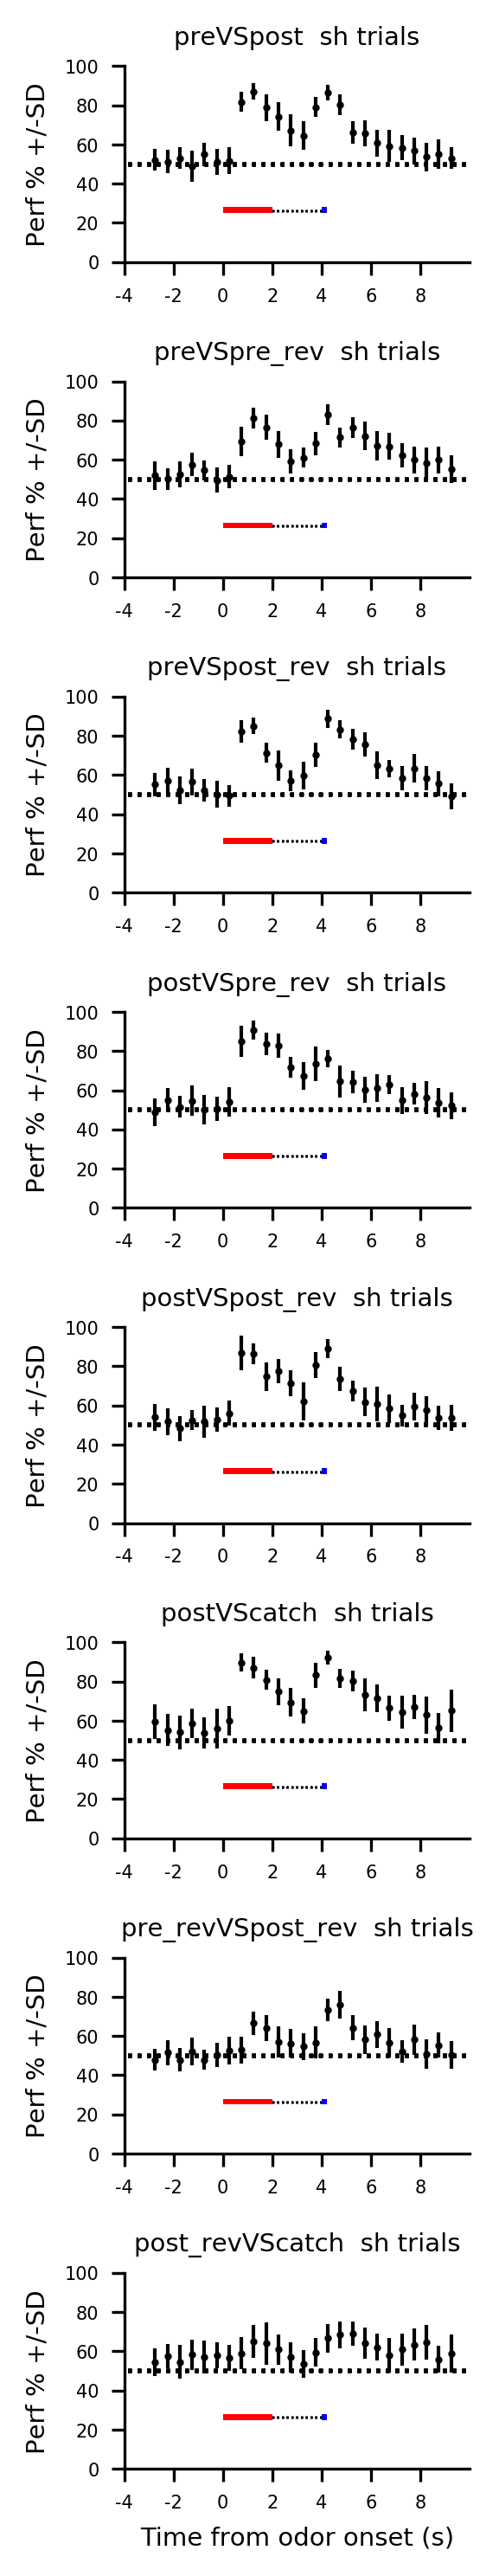

In [79]:
#to_plot = 'all'
#to_plot = 'rwVScsm'
#to_plot = 'shVScsm'
to_plot = 'sh'

order=[]
for x in [1,7,6,5,2,4,3,0]:
    order.append(eval("all_%s.keys()[x]"%to_plot))

fig, ax = pl.subplots(len(order),1, figsize=(2, 10))    

for i,t in zip(range(len(order)), order):
    for r in range(25):
        ax[i].plot((r/2.0)-2.75, np.mean(eval("all_%s"%to_plot)[t][r][r])*100, 'o', color='k', ls='-',lw=.5, zorder=19 ,ms=1)
        m = np.mean(eval("all_%s"%to_plot)[t][r][r])*100
        s = np.std(eval("all_%s"%to_plot)[t][r][r])*100
        ax[i].errorbar((r/2.0)-2.75, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
        ax[i].set_ylim(0, 100)
        ax[i].set_xlim(-4, 10)
        ax[i].set_xticks(np.arange(-4,10, 2))
        ax[i].set_xticklabels(np.arange(-4,10, 2))
        ax[i].hlines(50, -5,11, color='k', lw=1, linestyles='dotted')
        ax[i].set_ylabel('Perf % +/-SD')
        pt.plot_period_bar(ax[i], 25, start_end=(0, 2), color='r', delta_y=3)
        # pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
        pt.plot_period_bar(ax[i], 25, start_end=(4, 4.2), color='b', delta_y=3)
        ax[i].hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
        ax[i].set_title(t+'  %s trials'%(to_plot))
ax[i].set_xlabel('Time from odor onset (s)')


fig.tight_layout(pad=2)

#fig.savefig('../img/%s_tb_matched_all_%s.jpg'%(NOTEBOOK_NAME,to_plot))

In [80]:
mega_catch_list_col1 = ['zeroes'],['preVSpost'],['preVSpre_rev'],['preVSpost_rev'],['zeroes']
mega_catch_list_col2 = ['preVSpost'],['zeroes'],['postVSpre_rev'],['postVSpost_rev'],['postVScatch']
mega_catch_list_col3 = ['preVSpre_rev'],['postVSpre_rev'],['zeroes'],['pre_revVSpost_rev'],['zeroes']
mega_catch_list_col4 = ['preVSpost_rev'],['postVSpost_rev'],['pre_revVSpost_rev'],['zeroes'],['post_revVScatch']
mega_catch_list_col5 = ['zeroes'],['postVScatch'],['zeroes'],['post_revVScatch'],['zeroes']

In [81]:
for vs in 'csm','sh','rw':
    for col in range(1,6): # how many entries are there in each list?
        exec("mega_catch_col%s_%s = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]"%(col,vs))
        for x in range(len(all_rw_mean['preVSpost'])):
            exec("mega_catch_col%s_%s[x] = []"%(col,vs))
            for c in range(5): #how many lists are there
                for comp in eval("mega_catch_list_col%s[%s]"%((c+1),col-1)):
                    for y in range(len(all_rw_mean['preVSpost'])):
                        #print col,x,c,comp,y,'ok',
                        if comp == 'zeroes':
                            eval("mega_catch_col%s_%s[x]"%(col,vs)).insert((25*c)+y, -1)
                        else:
                            eval("mega_catch_col%s_%s[x]"%(col,vs)).insert((25*c)+y, eval("%s_all_%s_mean[comp][y]"%(vs,x)))

In [82]:
for vs in 'csm','sh','rw':
    exec("mega_catch_distinct_means_%s = mega_catch_col1_%s +mega_catch_col2_%s +mega_catch_col3_%s +mega_catch_col4_%s +\
    mega_catch_col5_%s"%(vs,vs,vs,vs,vs,vs))

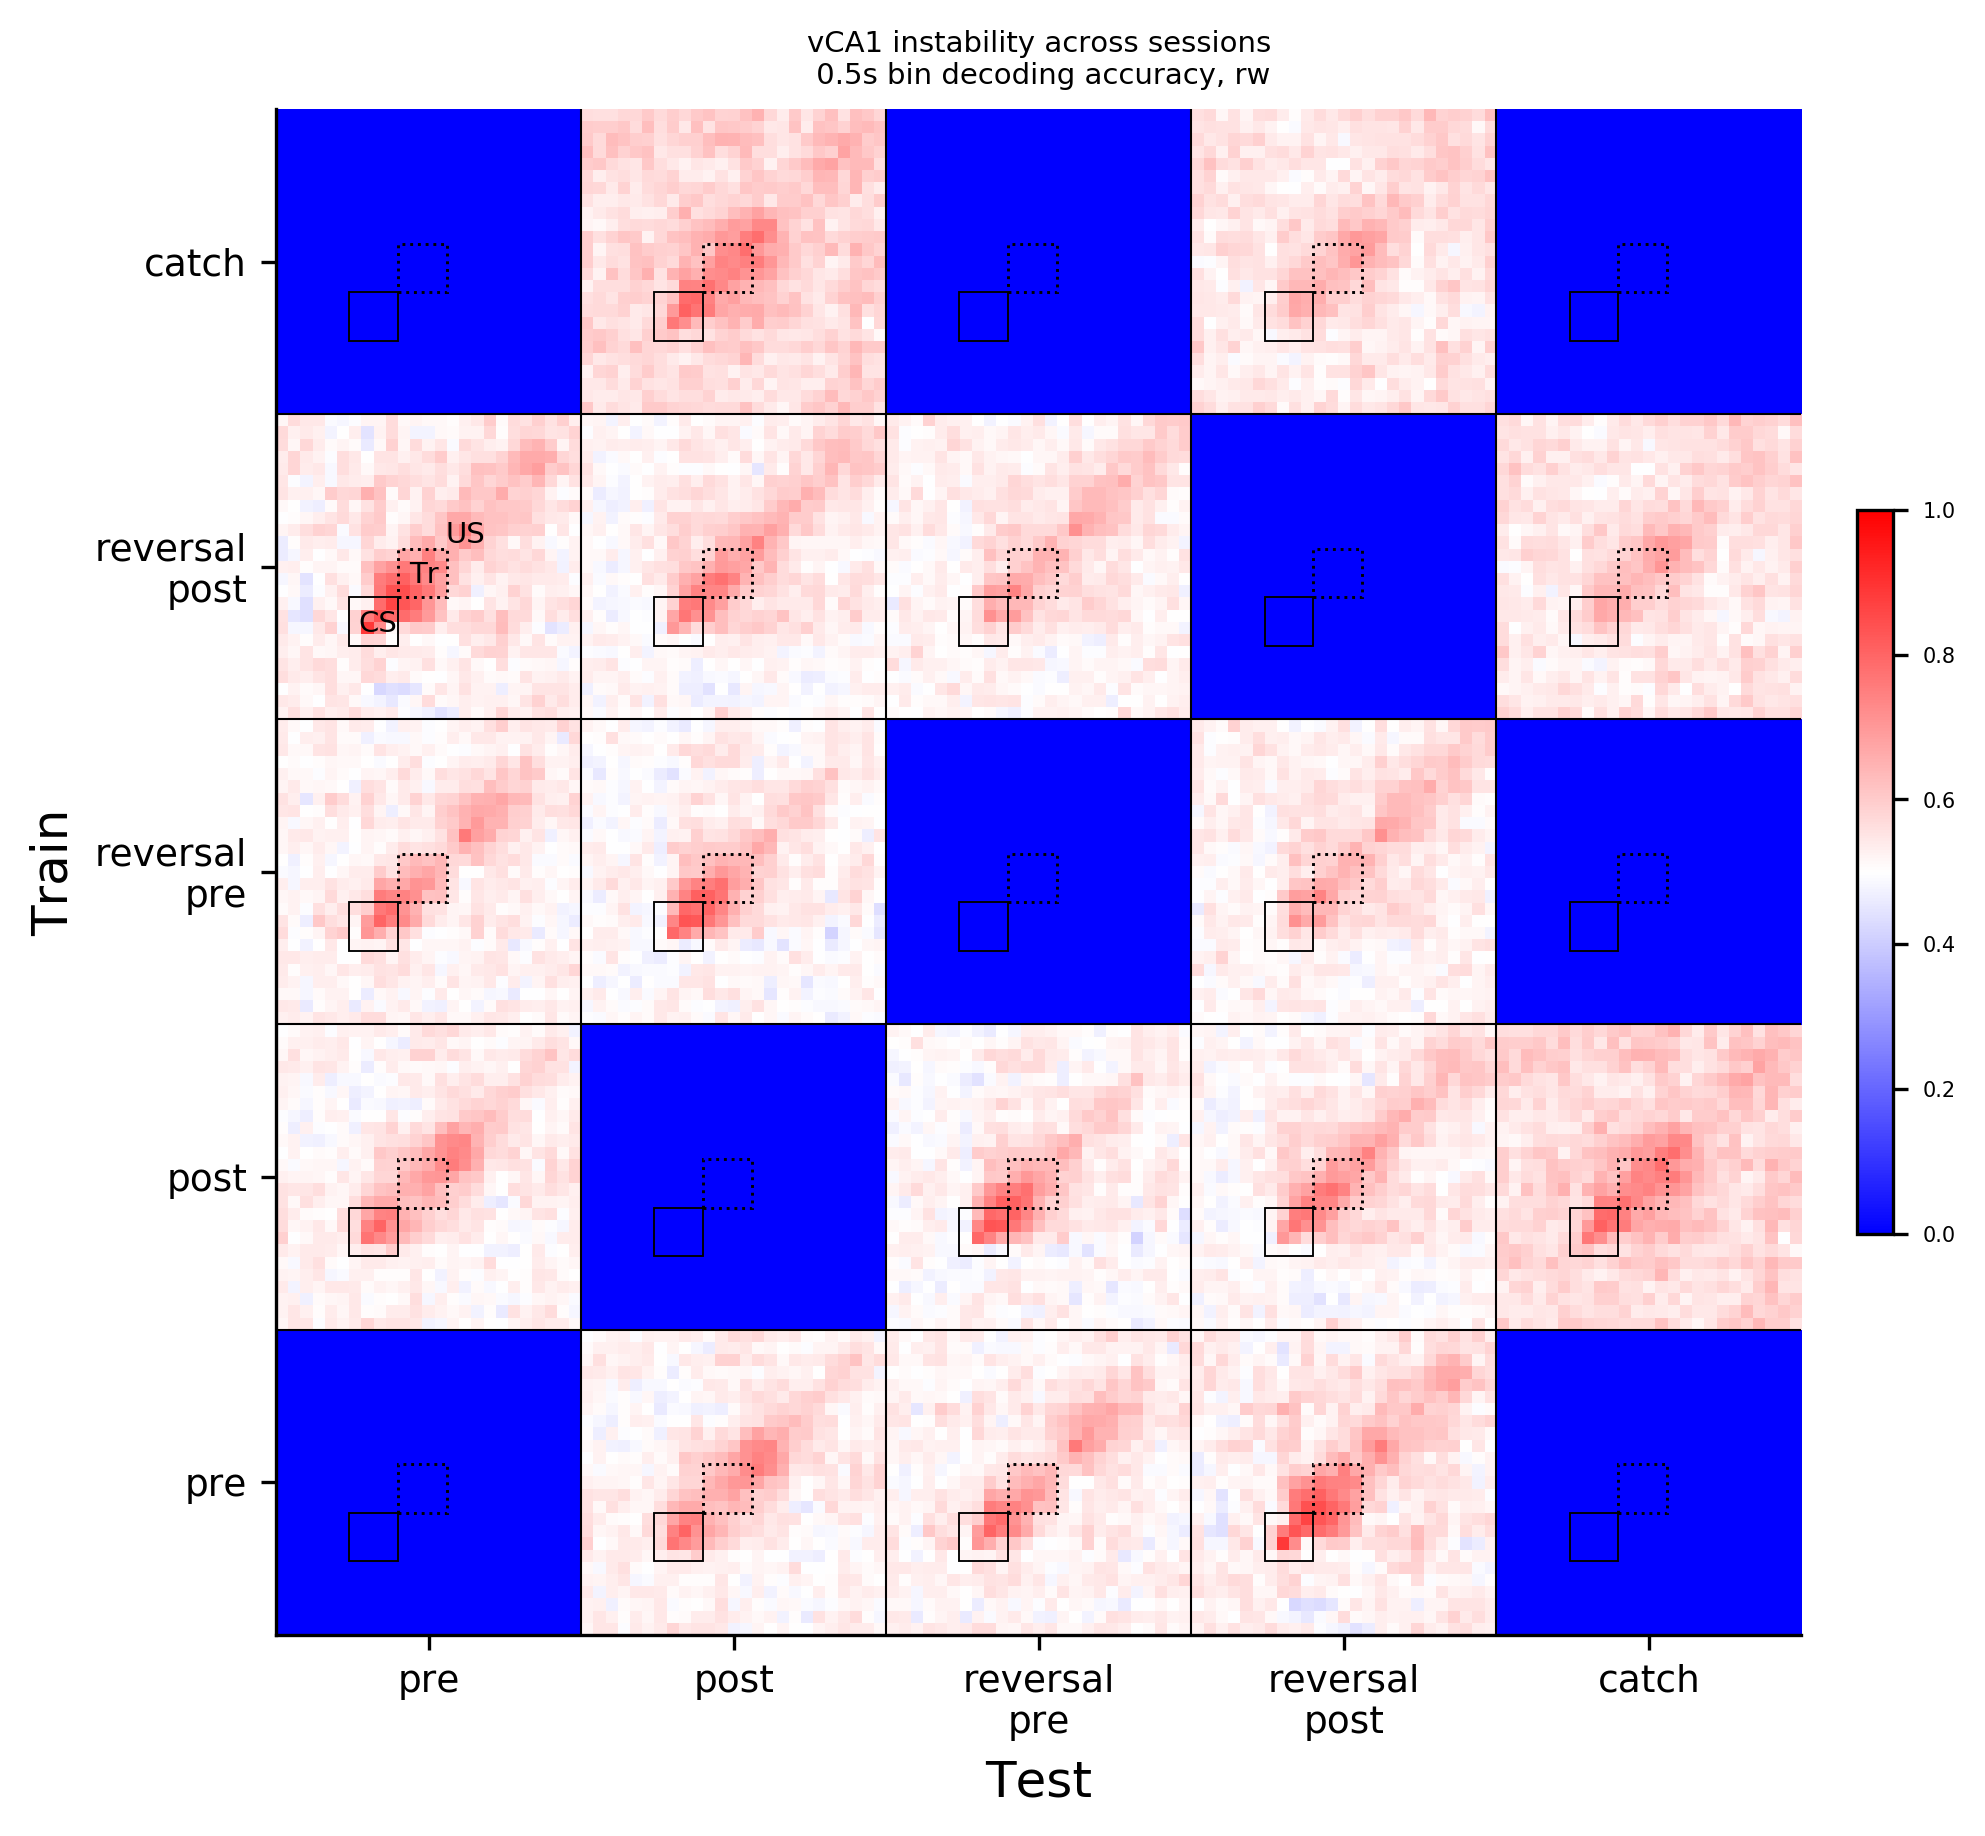

In [88]:
#to_plot = 'csm'
#to_plot = 'sh'
to_plot = 'rw'
fig,ax = pl.subplots(1,figsize=(8,8))
im = ax.imshow(eval("mega_catch_distinct_means_%s"%to_plot),origin='lower', interpolation='nearest',vmin=0, vmax=1,cmap='bwr')
ticks = [12,37,62,87,112]
ax.set_xticks(ticks)
#ax.set_xticks((6,22,38,54,70),minor=True)
ax.set_yticks(ticks)
#ax.set_yticks((6,22,38,54,70),minor=True)
#ax.set_ylim(0,85)
#ax.set_xlim(0,85)
ax.set_xticklabels(['pre','post','reversal\npre','reversal\npost','catch'],fontsize=9)
ax.set_yticklabels(['pre','post','reversal\npre','reversal\npost','catch'],fontsize=9)
ax.set_ylabel('Train', fontsize=12)
ax.set_xlabel('Test', fontsize=12)
pl.hlines([24.5,49.5,74.5,99.5],-0.5,124.5,color='k')
pl.vlines([24.5,49.5,74.5,99.5],-0.5,124.5,color='k')
##pl.vlines(2,-0.5,2,color='pink')
##pl.hlines(2,-0.5,2,color='pink')
pl.title("vCA1 instability across sessions\n 0.5s bin decoding accuracy, "+to_plot)
#pl.text(2,2,"CS",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')
#pl.text(3,3,"Tr",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')
#pl.text(4,4,"US",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')

import matplotlib.patches as patches
# Create a Rectangle patch
for i in range(5):
    CS1 = patches.Rectangle((i*25+5.5, 0*25+5.5),4,4,linewidth=.45,edgecolor='k',facecolor='none')
    CS2 = patches.Rectangle((i*25+5.5, 1*25+5.5),4,4,linewidth=.45,edgecolor='k',facecolor='none')
    CS3 = patches.Rectangle((i*25+5.5, 2*25+5.5),4,4,linewidth=.45,edgecolor='k',facecolor='none')
    CS4 = patches.Rectangle((i*25+5.5, 3*25+5.5),4,4,linewidth=.45,edgecolor='k',facecolor='none')
    CS5 = patches.Rectangle((i*25+5.5, 4*25+5.5),4,4,linewidth=.45,edgecolor='k',facecolor='none')
    Tr1 = patches.Rectangle((i*25+9.5, 0*25+9.5),4,4,linewidth=.7,edgecolor='k',facecolor='none',linestyle=':')
    Tr2 = patches.Rectangle((i*25+9.5, 1*25+9.5),4,4,linewidth=.7,edgecolor='k',facecolor='none',linestyle=':')
    Tr3 = patches.Rectangle((i*25+9.5, 2*25+9.5),4,4,linewidth=.7,edgecolor='k',facecolor='none',linestyle=':')
    Tr4 = patches.Rectangle((i*25+9.5, 3*25+9.5),4,4,linewidth=.7,edgecolor='k',facecolor='none',linestyle=':')
    Tr5 = patches.Rectangle((i*25+9.5, 4*25+9.5),4,4,linewidth=.7,edgecolor='k',facecolor='none',linestyle=':')
# Add the patch to the Axes
    ax.add_patch(CS1)
    ax.add_patch(CS2)
    ax.add_patch(CS3)
    ax.add_patch(CS4)
    ax.add_patch(CS5)
    ax.add_patch(Tr1)
    ax.add_patch(Tr2)
    ax.add_patch(Tr3)
    ax.add_patch(Tr4)
    ax.add_patch(Tr5)

pl.text(6.2,81.7,"CS",fontsize=7, color='k')
pl.text(10.4,85.7,"Tr",fontsize=7, color='k')
pl.text(13.4,89,"US",fontsize=7, color='k')

#cax = fig.add_axes([.85, 0.86, 0.05, 0.05])
fig.colorbar(im, shrink=0.4, pad=0.03)

fig.savefig('../img/%s_MEGA_MATRIX_with_catch_%s.jpg'%(NOTEBOOK_NAME,to_plot))

## Now hold odor constant across sessions (not outcome)

In [42]:
cross_comparisons = 'post_revVScatch','preVSpre_rev','preVSpost_rev','postVSpre_rev','postVSpost_rev','postVScatch'

In [43]:
#relabel and combine session labels for 2 sessions into 1 array
#(so can test decoding of same odor across different sessions)

relabel_csm_sess1 = {0:0, 1:-1, 2:-1, -1:-1, -2:-2}
relabel_csm_sess2 = {0:1, 1:-1, 2:-1, -1:-1, -2:-2}
relabel_rw_sess1 =  {0:-1, 1:0, 2:-1, -1:-1, -2:-2}
relabel_rw_sess2 =  {0:-1, 1:1, 2:-1, -1:-1, -2:-2}
relabel_sh_sess1 =  {0:-1, 1:-1, 2:0, -1:-1, -2:-2}
relabel_sh_sess2 =  {0:-1, 1:-1, 2:1, -1:-1, -2:-2}

for comp in cross_comparisons:
    exec("odor_labels_csm_csm_%s = {}"%comp)
    exec("odor_labels_rw_sh_%s = {}"%comp)
    exec("odor_labels_sh_rw_%s = {}"%comp)
    for ani in eval("%s_animals"%comp):
        exec("odor_labels_csm_csm_%s[ani] = np.r_[[relabel_csm_sess1[l] for l in labels_%s[ani]]+[relabel_csm_sess2[l] for l in labels_%s[ani]]]"%(comp,comp.split('VS')[0],comp.split('VS')[1]))
        exec("odor_labels_rw_sh_%s[ani] = np.r_[[relabel_rw_sess1[l] for l in labels_%s[ani]]+[relabel_sh_sess2[l] for l in labels_%s[ani]]]"%(comp,comp.split('VS')[0],comp.split('VS')[1]))
        exec("odor_labels_sh_rw_%s[ani] = np.r_[[relabel_sh_sess1[l] for l in labels_%s[ani]]+[relabel_rw_sess2[l] for l in labels_%s[ani]]]"%(comp,comp.split('VS')[0],comp.split('VS')[1]))

In [57]:
%%time
#within and across time bins, across sessions
n_loops=15
for vs_odor in ['csm_csm','sh_rw','rw_sh']:
    for comp in cross_comparisons:
        for t in range(25):
            for c in range(25):
                exec('odor_%s_scores_%s_tb%svs%s = {}'%(vs,comp,t,c))
                #print comp,t,c," ",
                exec('odor_%s_scores_%s_tb%svs%s = np.r_[[do_test_cross_distinct(%s_tb_%s,odor_labels_%s_%s,%s_tb_%s,\
                     odor_labels_%s_%s,n_cells=n_cells,classes=None) for r in range(n_loops)]]'%(vs_odor,comp,t,c,comp,t,vs_odor,comp,comp,c,vs_odor,comp))
        exec("print '%s %s',"%(vs_odor,comp))
        print 'DONE!',
        print '    ',

sh_rw post_revVScatch DONE!      sh_rw preVSpre_rev DONE!      sh_rw preVSpost_rev DONE!      sh_rw postVSpre_rev DONE!      sh_rw postVSpost_rev DONE!      sh_rw postVScatch DONE!     CPU times: user 51min 2s, sys: 4.02 s, total: 51min 6s
Wall time: 51min 2s



In [59]:
for t in range(25):
    exec('csm_csm_all_%s = {}'%t)
    exec('sh_rw_all_%s = {}'%t)
    exec('rw_sh_all_%s = {}'%t)
    
for vs in 'csm_csm','sh_rw','rw_sh':
    for comp in cross_comparisons:
        for t in range(25):
            exec("%s_all_%s['%s'] = []"%(vs,t,comp)) #comparisons across all time bins
            for c in range(25):
                #print t, eval("distinct%s['%s_%s_%s']"%(t,AC[i].split('__')[0],AC[i].split('__')[-1],AC[i+1].split('__')[-1]))
                eval("%s_all_%s['%s']"%(vs,t,comp)).insert(c,(eval('odor_%s_scores_%s_tb%svs%s'%(vs,comp,t,c))))

In [60]:
for vs in 'csm_csm','sh_rw','rw_sh':
    exec("all_%s={}"%vs)
    for i in eval("%s_all_0"%(vs)):
        exec("all_%s[i]=[]"%vs)
        for r in range(len(eval("%s_all_0[i]"%(vs)))):
            eval("all_%s[i]"%vs).append(eval("%s_all_%s"%(vs,r))[i])
        np.array([eval("all_%s[i]"%vs)])

In [62]:
for t in range(25):
    exec('csm_csm_all_%s_mean = {}'%t)
    exec('sh_rw_all_%s_mean = {}'%t)
    exec('rw_sh_all_%s_mean = {}'%t)
    
for vs in 'csm_csm','sh_rw','rw_sh':
    for comp in cross_comparisons:
        for t in range(25):
            exec("%s_all_%s_mean['%s'] = []"%(vs,t,comp)) #comparisons across all time bins
            for c in range(25):
                #print vs,comp,t,c,
                eval("%s_all_%s_mean['%s']"%(vs,t,comp)).insert(c,(eval('odor_%s_scores_%s_tb%svs%s'%(vs,comp,t,c)).mean(1)).mean())

In [63]:
for vs in 'csm_csm','sh_rw','rw_sh':
    exec("all_%s_mean={}"%vs)
    for i in eval("%s_all_0_mean"%(vs)):
        exec("all_%s_mean[i]=[]"%vs)
        for r in range(len(eval("%s_all_0_mean[i]"%(vs)))):
            eval("all_%s_mean[i]"%vs).append(eval("%s_all_%s_mean"%(vs,r))[i])
        np.array([eval("all_%s_mean[i]"%vs)])

In [64]:
for x in zip (range(len(all_rw_sh.keys())),all_rw_sh.keys()):
    print x

(0, 'post_revVScatch')
(1, 'postVSpost_rev')
(2, 'preVSpre_rev')
(3, 'postVSpre_rev')
(4, 'preVSpost_rev')
(5, 'postVScatch')


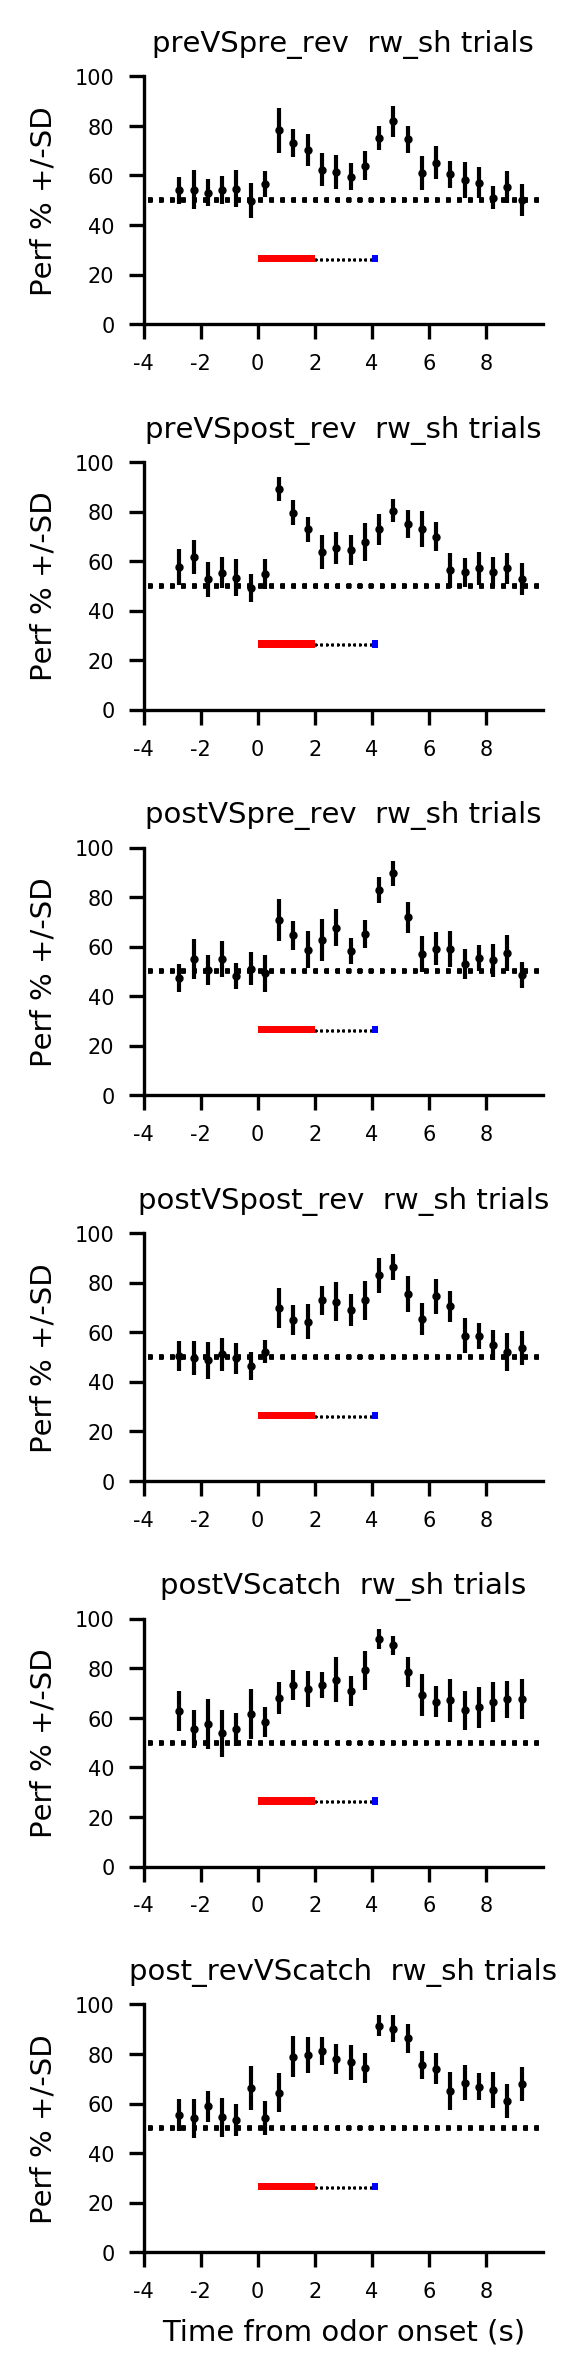

In [65]:
#to_plot = 'csm_csm'
to_plot = 'rw_sh'
#to_plot = 'sh_rw'

order=[]
for x in [2,4,3,1,5,0]:
    order.append(eval("all_%s.keys()[x]"%to_plot))

fig, ax = pl.subplots(len(order),1, figsize=(2, 8))    

for i,t in zip(range(len(order)), order):
    for r in range(25):
        ax[i].plot((r/2.0)-2.75, np.mean(eval("all_%s"%to_plot)[t][r][r])*100, 'o', color='k', ls='-',lw=.5, zorder=19 ,ms=1)
        m = np.mean(eval("all_%s"%to_plot)[t][r][r])*100
        s = np.std(eval("all_%s"%to_plot)[t][r][r])*100
        ax[i].errorbar((r/2.0)-2.75, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
        ax[i].set_ylim(0, 100)
        ax[i].set_xlim(-4, 10)
        ax[i].set_xticks(np.arange(-4,10, 2))
        ax[i].set_xticklabels(np.arange(-4,10, 2))
        ax[i].hlines(50, -5,11, color='k', lw=1, linestyles='dotted')
        ax[i].set_ylabel('Perf % +/-SD')
        pt.plot_period_bar(ax[i], 25, start_end=(0, 2), color='r', delta_y=3)
        # pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
        pt.plot_period_bar(ax[i], 25, start_end=(4, 4.2), color='b', delta_y=3)
        ax[i].hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
        ax[i].set_title(t+'  %s trials'%(to_plot))
ax[i].set_xlabel('Time from odor onset (s)')


fig.tight_layout(pad=2)

#fig.savefig('../img/%s_odor_tb_matched_all_%s.jpg'%(NOTEBOOK_NAME,to_plot))

In [66]:
odor_mega_catch_list_col1 = ['zeroes'],['zeroes'],['preVSpre_rev'],['preVSpost_rev'],['zeroes']
odor_mega_catch_list_col2 = ['zeroes'],['zeroes'],['postVSpre_rev'],['postVSpost_rev'],['postVScatch']
odor_mega_catch_list_col3 = ['preVSpre_rev'],['postVSpre_rev'],['zeroes'],['zeroes'],['zeroes']
odor_mega_catch_list_col4 = ['preVSpost_rev'],['postVSpost_rev'],['zeroes'],['zeroes'],['post_revVScatch']
odor_mega_catch_list_col5 = ['zeroes'],['postVScatch'],['zeroes'],['post_revVScatch'],['zeroes']

In [67]:
for vs in 'csm_csm','sh_rw','rw_sh':
    for col in range(1,6): # how many entries are there in each list?
        exec("odor_mega_catch_col%s_%s = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]"%(col,vs))
        for x in range(len(all_rw_sh_mean['preVSpre_rev'])):
            exec("odor_mega_catch_col%s_%s[x] = []"%(col,vs))
            for c in range(5): #how many lists are there
                for comp in eval("odor_mega_catch_list_col%s[%s]"%((c+1),col-1)):
                    for y in range(len(all_rw_sh_mean['preVSpre_rev'])):
                        #print col,x,c,comp,y,'ok',
                        if comp == 'zeroes':
                            eval("odor_mega_catch_col%s_%s[x]"%(col,vs)).insert((25*c)+y, -1)
                        else:
                            eval("odor_mega_catch_col%s_%s[x]"%(col,vs)).insert((25*c)+y, eval("%s_all_%s_mean[comp][y]"%(vs,x)))

In [68]:
for vs in 'csm_csm','sh_rw','rw_sh':
    exec("odor_mega_catch_distinct_means_%s = odor_mega_catch_col1_%s +odor_mega_catch_col2_%s +odor_mega_catch_col3_%s +odor_mega_catch_col4_%s +\
    odor_mega_catch_col5_%s"%(vs,vs,vs,vs,vs,vs))

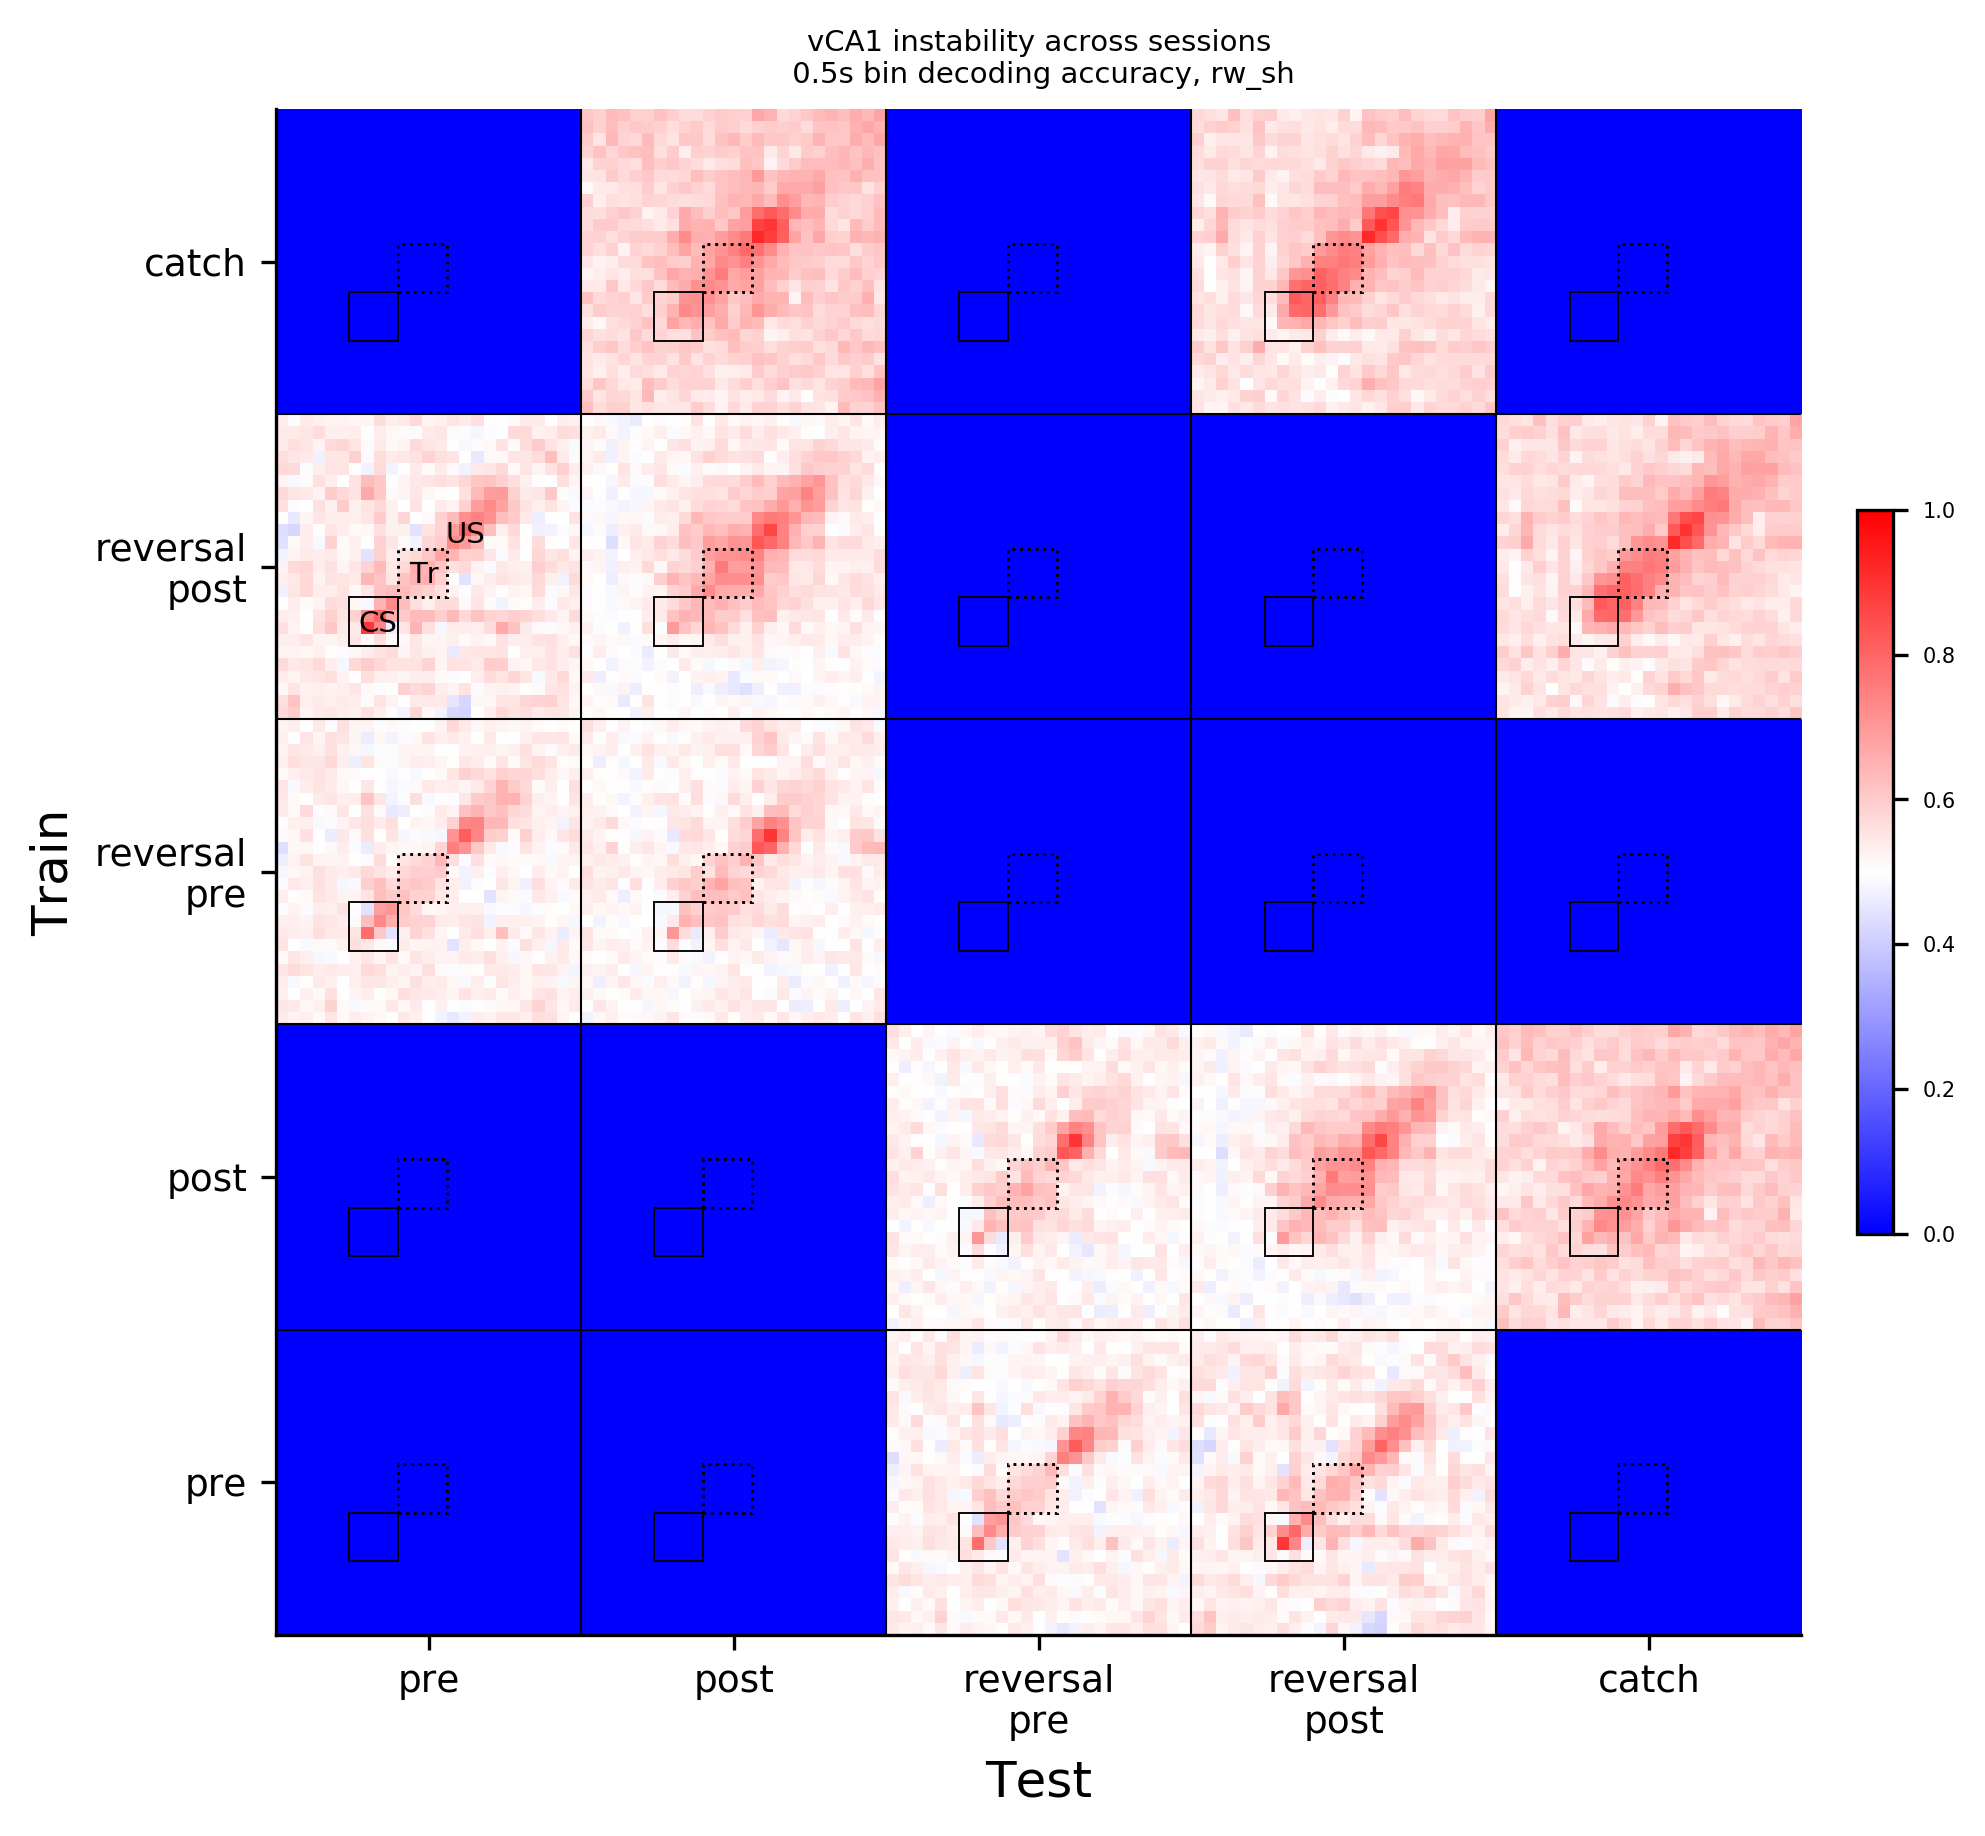

In [70]:
#to_plot = 'csm_csm'
#to_plot = 'sh_rw'
to_plot = 'rw_sh'
fig,ax = pl.subplots(1,figsize=(8,8))
im = ax.imshow(eval("odor_mega_catch_distinct_means_%s"%to_plot),origin='lower', interpolation='nearest',vmin=0, vmax=1,cmap='bwr')
ticks = [12,37,62,87,112]
ax.set_xticks(ticks)
#ax.set_xticks((6,22,38,54,70),minor=True)
ax.set_yticks(ticks)
#ax.set_yticks((6,22,38,54,70),minor=True)
#ax.set_ylim(0,85)
#ax.set_xlim(0,85)
ax.set_xticklabels(['pre','post','reversal\npre','reversal\npost','catch'],fontsize=9)
ax.set_yticklabels(['pre','post','reversal\npre','reversal\npost','catch'],fontsize=9)
ax.set_ylabel('Train', fontsize=12)
ax.set_xlabel('Test', fontsize=12)
pl.hlines([24.5,49.5,74.5,99.5],-0.5,124.5,color='k')
pl.vlines([24.5,49.5,74.5,99.5],-0.5,124.5,color='k')
##pl.vlines(2,-0.5,2,color='pink')
##pl.hlines(2,-0.5,2,color='pink')
pl.title("vCA1 instability across sessions\n 0.5s bin decoding accuracy, "+to_plot)
#pl.text(2,2,"CS",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')
#pl.text(3,3,"Tr",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')
#pl.text(4,4,"US",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')

import matplotlib.patches as patches
# Create a Rectangle patch
for i in range(5):
    CS1 = patches.Rectangle((i*25+5.5, 0*25+5.5),4,4,linewidth=.45,edgecolor='k',facecolor='none')
    CS2 = patches.Rectangle((i*25+5.5, 1*25+5.5),4,4,linewidth=.45,edgecolor='k',facecolor='none')
    CS3 = patches.Rectangle((i*25+5.5, 2*25+5.5),4,4,linewidth=.45,edgecolor='k',facecolor='none')
    CS4 = patches.Rectangle((i*25+5.5, 3*25+5.5),4,4,linewidth=.45,edgecolor='k',facecolor='none')
    CS5 = patches.Rectangle((i*25+5.5, 4*25+5.5),4,4,linewidth=.45,edgecolor='k',facecolor='none')
    Tr1 = patches.Rectangle((i*25+9.5, 0*25+9.5),4,4,linewidth=.7,edgecolor='k',facecolor='none',linestyle=':')
    Tr2 = patches.Rectangle((i*25+9.5, 1*25+9.5),4,4,linewidth=.7,edgecolor='k',facecolor='none',linestyle=':')
    Tr3 = patches.Rectangle((i*25+9.5, 2*25+9.5),4,4,linewidth=.7,edgecolor='k',facecolor='none',linestyle=':')
    Tr4 = patches.Rectangle((i*25+9.5, 3*25+9.5),4,4,linewidth=.7,edgecolor='k',facecolor='none',linestyle=':')
    Tr5 = patches.Rectangle((i*25+9.5, 4*25+9.5),4,4,linewidth=.7,edgecolor='k',facecolor='none',linestyle=':')
# Add the patch to the Axes
    ax.add_patch(CS1)
    ax.add_patch(CS2)
    ax.add_patch(CS3)
    ax.add_patch(CS4)
    ax.add_patch(CS5)
    ax.add_patch(Tr1)
    ax.add_patch(Tr2)
    ax.add_patch(Tr3)
    ax.add_patch(Tr4)
    ax.add_patch(Tr5)

pl.text(6.2,81.7,"CS",fontsize=7, color='k')
pl.text(10.4,85.7,"Tr",fontsize=7, color='k')
pl.text(13.4,89,"US",fontsize=7, color='k')

#cax = fig.add_axes([.85, 0.86, 0.05, 0.05])
fig.colorbar(im, shrink=0.4, pad=0.03)

fig.savefig('../img/%s_odor_MEGA_MATRIX_with_catch_%s.jpg'%(NOTEBOOK_NAME,to_plot))

In [84]:
save_workspace(db)

Could not store variable 'fig'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'im'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'Tr1'. Skipping...
Could not store variable 'Tr3'. Skipping...
Could not store variable 'Tr2'. Skipping...
Could not store variable 'Tr5'. Skipping...
Could not store variable 'Tr4'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'ax'. Skipping...
Could not store variable 'CS5'. Skipping...
Could not store variable 'CS4'. Skipping...
Could not store variable 'CS1'. Skipping...
Could not store variable 'CS3'.